aprovechamiento con clave  excelente  da  exento
aprovechamiento con clave  deficiente  da  extraordinario
con padre  aprovechamiento  y clave  bueno da  puntualidad con clave  asiste  da  exento
con padre  aprovechamiento  y clave  bueno da  puntualidad con clave  no asiste  da  final
con padre  aprovechamiento  y clave  regular da  puntualidad con clave  asiste  da  final
con padre  aprovechamiento  y clave  regular da  puntualidad con clave  no asiste  da  extraordinario


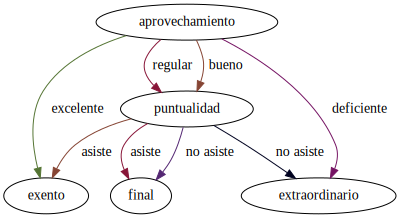

In [247]:
import pandas as pd
import math
import pygraphviz as pgv
import random
archivo_excel = pd.read_excel('./datos.xlsx')


atributos=archivo_excel.columns[0:-1].tolist()
posibles_resultados=set(archivo_excel["nota"].tolist());
# print(posibles_resultados)
entriopiaGeneral=0;


G = pgv.AGraph(directed=True, strict=False, rankdir="TB")

def entriopia(dataframe,atributo):
    clases_array=dataframe[atributo].tolist()
    casos_general=len(dataframe.axes[0]);
    clases=dict()
    entriopias=dict()
    
    for i in clases_array:
        if i in clases:
            clases[i]+=1
        else:
            clases[i]=1
            
    for i in clases_array:
        if i not in entriopias:
            entriopias[i]=-((clases[i]/casos_general)*math.log(clases[i]/casos_general,2))
            
    return sum(entriopias.values())




        
def ganancia(dataframe, atributo,entriopiaGeneral):
    
    casos_general=len(archivo_excel.axes[0]);
    ganancias_atributo=dict()
    clases_array=dataframe[atributo].tolist()
 
    clasificacion_clases=dict()
    clases=list()
    for i in clases_array:
        if i in clases:
            clasificacion_clases[i]+=1
        else:
            clasificacion_clases[i]=1
            
        if i not in clases:
            clases.append(i)
    for i in clases:
        datos=dataframe[dataframe[atributo]==i]  
        # print(atributo)
        # print(datos)
        # print("_")
        ganancias_atributo[i]=entriopia(datos,"nota")
    
    ganancia_final=0;
    for i in ganancias_atributo:
        ganancia_final+=(clasificacion_clases[i]/casos_general)*ganancias_atributo[i]


    
    return entriopiaGeneral-ganancia_final        



def clasificacion(atributo, dataframe,atributos,clave="",padre=""):
    casos_general=len(archivo_excel.axes[0]);
    ganancias_atributo=dict()
    clases_array=dataframe[atributo].tolist()
    clasificacion_clases=dict()
    clases=list()
    for i in clases_array:
        
      
        if i in clases:
            clasificacion_clases[i]+=1
        else:
            clasificacion_clases[i]=1
            
        if i not in clases:
            clases.append(i)
        

    
    
    
    for i in clases:
        datos=dataframe[dataframe[atributo]==i]  
        ganancias_atributo[i]=entriopia(datos,"nota")
    
  

    
    # print(ganancias_atributo)
    faltantes=dict()
    faltantes_dataframe=dict()
    conexiones=list()
    for key in ganancias_atributo:
        color=str(random.randint(0, 9))+ str(random.randint(0, 9))+str(random.randint(0, 9))+str(random.randint(0, 9))+str(random.randint(0, 9))+str(random.randint(0, 9));
        if ganancias_atributo[key]==0:
            
            
            
            if(padre!=""):
            
            
                if str(padre+"-"+atributo+"-"+clave) not in conexiones:    
                    G.add_edge(padre, atributo, label=clave,color="#"+color)
                    conexiones.append(str(padre+"-"+atributo+"-"+clave))
                if str(atributo+"-"+dataframe.query(str(atributo+"=='"+key+"'")).iloc[0]["nota"]+"-"+key) not in conexiones:    
                
                    G.add_edge(atributo, dataframe.query(str(atributo+"=='"+key+"'")).iloc[0]["nota"], label=key,color="#"+color)
                    conexiones.append(str(atributo+"-"+dataframe.query(str(atributo+"=='"+key+"'")).iloc[0]["nota"]+"-"+key))
                
                    
                print("con padre ",padre," y clave ",clave,"da ",atributo,"con clave ",key, " da ",dataframe.query(str(atributo+"=='"+key+"'")).iloc[0]["nota"])
            else:
                print(atributo,"con clave ",key, " da ",dataframe.query(str(atributo+"=='"+key+"'")).iloc[0]["nota"])
                if str(atributo+"-"+dataframe.query(str(atributo+"=='"+key+"'")).iloc[0]["nota"]+"-"+key) not in conexiones: 
                    G.add_edge(atributo, dataframe.query(str(atributo+"=='"+key+"'")).iloc[0]["nota"], label=key,color="#"+color)
        else:
            
            for i in atributos:
                if i != atributo:
                    if key not in faltantes:
                        faltantes[key]=dict()
                        faltantes[key][i]=ganancia(dataframe[dataframe[atributo]==key].drop(atributo,axis="columns"),i,ganancias_atributo[key])
                        faltantes_dataframe[key]=dataframe[dataframe[atributo]==key].drop(atributo,axis="columns")
                        
                    else:
                        faltantes[key][i]=ganancia(dataframe[dataframe[atributo]==key].drop(atributo,axis="columns"),i,ganancias_atributo[key])
                        faltantes_dataframe[key]=dataframe[dataframe[atributo]==key].drop(atributo,axis="columns")
                   

    # print(faltantes_dataframe)
    for i in faltantes:
        
        mayor_ganancia=max(faltantes[i],key=faltantes[i].get)
        
        clasificacion(mayor_ganancia,faltantes_dataframe[i],mayor_ganancia,i,atributo)
        
        
            
            
    


# main


if __name__ == "__main__":
        
    entriopiaGeneral= entriopia(archivo_excel,"nota")
    gananncias_general=dict()
 

    for i in atributos:
        gananncias_general[i]=ganancia(archivo_excel,i,entriopiaGeneral)
    
    

    # print(gananncias_general)
    atributo_mayor_ganancia=max(gananncias_general,key=gananncias_general.get)

    clasificacion(atributo_mayor_ganancia,archivo_excel,atributos)
    
  
    

G.layout("dot")
G

